# Import

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datensatz

In [4]:
filename = "data/madrid_reviews.csv"
data = pd.read_csv(filename)
data = data.drop(["Unnamed: 0"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176848 entries, 0 to 176847
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   parse_count      176848 non-null  int64 
 1   restaurant_name  176848 non-null  object
 2   rating_review    176848 non-null  int64 
 3   sample           176848 non-null  object
 4   review_id        176848 non-null  object
 5   title_review     176847 non-null  object
 6   review_preview   176848 non-null  object
 7   review_full      176848 non-null  object
 8   date             176848 non-null  object
 9   city             176848 non-null  object
 10  url_restaurant   176848 non-null  object
 11  author_id        176848 non-null  object
dtypes: int64(2), object(10)
memory usage: 16.2+ MB


# Reduziere Datensatz

In [5]:
# Reduziere den Datensatz auf 5.000 Einträge
sampled_data = data.sample(n=5000, random_state=0)

# Entferne Duplikate in der Spalte 'review_full'
sampled_data_unique = sampled_data.drop_duplicates(subset='review_full')

# Info über den neuen Datensatz
sampled_data_unique.head()


,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
5592,5603,Steakburger_Atocha,5,Positive,review_468298562,"Lovely meal, great taste of Madrid","Lovely meal, had a burger and chips and my fri...","Lovely meal, had a burger and chips and my fri...","March 18, 2017",Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_5334
147257,167444,Mercado_de_San_Miguel,5,Positive,review_569592693,Great tapas place,In Mercado San Miguel you can buy tapas from d...,In Mercado San Miguel you can buy tapas from d...,"March 29, 2018",Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_87739
132297,144272,Casa_Mingo,4,Positive,review_127203470,Pollos and Sidra,Lots of people come here on Sundays to get the...,Lots of people come here on Sundays to get the...,"April 3, 2012",Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_40911
64288,64648,Naia,5,Positive,review_299604040,"You must go to this restaurant - super, super,...",I had a super lunch with family here - the ser...,I had a super lunch with family here - the ser...,"August 15, 2015",Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_49052
116680,121101,Portobello_Rosario_Pino,3,Negative,review_479282977,A good shell and fish restaurant,"It is a good place to eat seafood, prawns with...","It is a good place to eat seafood, prawns with...","April 26, 2017",Madrid,https://www.tripadvisor.com/Restaurant_Review-...,UID_75153


Dieser Code verwendet die TF-IDF-Vektorisierung, um sowohl Unigramme als auch Bigramme aus den Textdaten der überprüften Daten zu berücksichtigen und sie in ein Vektorformat umzuwandeln

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# considers both unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  
tfidf_vectors = vectorizer.fit_transform(sampled_data_unique.review_full)
tfidf_vectors.shape

(5000, 131546)

# Ähnlichkeitsmatrix

Hier werden Spacy-Dokumente für jede Bewertung im Datensatz erstellt und anschließend eine leere Matrix initialisiert, um die Ähnlichkeitswerte zwischen den Dokumenten zu speichern, die dann iterativ berechnet und in diese Matrix eingetragen werden.

In [8]:
import spacy 

# Lade englischen Tokenizer, Tagger, Parser, NER und Wortvektoren.
nlp = spacy.load("en_core_web_lg") 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
reviews = sampled_data['review_full'].tolist()

# Erstelle Spacy-Dokumente für jede Überschrift
docs = [nlp(review) for review in reviews]

# Erstelle eine leere Matrix für die Ähnlichkeitswerte
similarity_matrix = np.zeros((len(docs), len(docs)))

# Fülle die Matrix mit Ähnlichkeitswerten
for i in range(len(docs)):
    for j in range(len(docs)):
        similarity_matrix[i][j] = docs[i].similarity(docs[j])


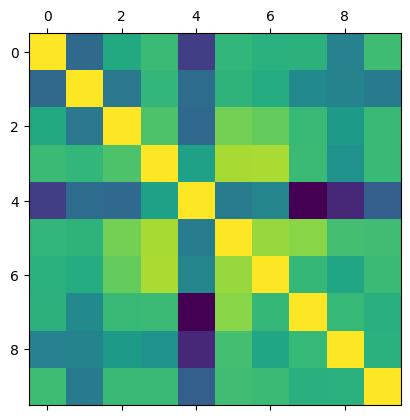

Lovely meal, had a burger and chips and my friends all had the same too. Lovely meal, honestly have no complaints at all!

In Mercado San Miguel you can buy tapas from different booths and enjoy them in the tables in the  middle. Nice atmosphere. Delicíous meat, frutti di mare, pastries,... Food and an experience in same package.

Lots of people come here on Sundays to get their Chicken to go, but you can also have it on the place. Being an Asturiano place, cider is served too. The service is not excellent and they don't accept credit cards, but you really cannot expect much for the reasonable price. It's near the Goya's frescoes, so maybe it's a good chance to kill two birds with one stone if you happen to be in Madrid.

I had a super lunch with family here - the service could not have been better, they were so lovely with us and so attentive with our children. The burrata was delicious and the brownie with violet icecream the best pudding I have had in a very long time. The interior 

In [8]:
# Plotte die ersten 10 Einträge mit matshow
plt.matshow(similarity_matrix[:10, :10])
plt.show()

# Drucke die ersten 10 Überschriften, jeweils getrennt durch einen Absatz
for review in reviews[:10]:
    print(review + '\n')

# Nächste-Nachbarn-Methode

In [10]:
# Definiere Kosinus Distanz
scores = 1 - similarity_matrix

In [116]:
# Grenzwert n_neighbours
n_neighbours = 100

# Sortiere die Scores und nimm die ersten n_neighbours Werte
sorted_scores = [sorted(score_array)[:n_neighbours] for score_array in scores]

# Berechne die Summe der Werte und die Anzahl der Instanzen in jedem Array
value_sums = [sum(score_array) for score_array in sorted_scores]
instance_counts = [len(score_array) for score_array in sorted_scores]

# Berechne den Durchschnitt für jedes Array
averages = [value_sum / instance_count for value_sum, instance_count in zip(value_sums, instance_counts)]

# Sortiere die Indizes nach den Durchschnittswerten
sorted_indices = sorted(range(len(averages)), key=lambda i: averages[i], reverse=True)

# Zeige die Top 5
top_5_indices = sorted_indices[:5]
print("Top 5:")
for i in top_5_indices:
    print('Mittelwert:', averages[i], ' Index:', i)
    print('Headline: ' , reviews[i])

# Initialisiere eine Liste für die Ausreißer
outliers = []

# Iteriere von oben nach unten durch die sortierten Indizes
for i in range(len(sorted_indices) - 1):
    # Überprüfe, ob der Abstand zum nächsten Wert größer oder gleich 0.1 ist
    if averages[sorted_indices[i]] - averages[sorted_indices[i + 1]] >= 0.1:
        # Füge den Index und alle darüberliegenden Werte zur Liste der Ausreißer hinzu
        outliers.extend(sorted_indices[:i+1])
        break

# Entferne die Ausreißer aus der Liste der Durchschnittswerte und der sortierten Indizes
print('\nDiese Werte sind vermutlich Ausreißer und wurden aus der Liste entfernt, um eine bessere Seltenheitsskala zu erstellen:')
for outlier in outliers:
    print('Mittelwert:', averages[outlier], ' Index:', outlier)

# Erstelle eine Kopie der Durchschnittswerte
clean_averages = averages.copy()

# Entferne die Ausreißer aus der Liste der bereinigten Durchschnittswerte
for outlier in outliers:
    clean_averages.remove(averages[outlier])

# Sortiere die Indizes der bereinigten Durchschnittswerte
clean_sorted_indices = sorted(range(len(clean_averages)), key=lambda i: clean_averages[i])

# Zeige die letzten 5 der bereinigten Liste
last_5_indices = clean_sorted_indices[:5]
print("\nLast 5:")
for i in last_5_indices:
    print('Mittelwert:', clean_averages[i], ' Index:', i)
    print('Headline: ' , reviews[i])


Top 5:
Mittelwert: 0.5171237680930735  Index: 3991
Headline:  Questo posto necessita innanzitutto di una raccomandazione: dimenticate le parole antipasto, primo e secondo e fidatevi del mio consiglio. Prendete due tre portate in quattro, non di più. Altrimenti rischiate di non finire il cibo.  In quattro abbiamo preso: un insalata con il baccalà e il pulpito gallego di antipasto. Il polpo era qualcosa di divino. Uno di noi ha preso un menu del dia, con trippa e pollo, mentre gli altri hanno preso una porzione di riso funghi e tartufo, buonissima, e soprattutto due porzioni di carne arrosto.  Questo merita una descrizione. La carne viene portata in quantità industriale cruda e ogni tavolo viene fornito di una sorta di fornellino. Una figata pazzesca. Poi abbiamo preso patate fritte, un vassoio, dolce, una bottiglia di vino, gassosa, birra e acqua. Un caffé. 138 euro in totale.  Se avessimo saputo quanto erano enormi le dosi, avremmo preso meno roba, comunque da provare.
Mittelwert: 0.41

In [117]:
# Normalisierung und Umkehrung
rarityScore = clean_averages
min_score = min(rarityScore)
max_score = max(rarityScore)
rarityScore = (rarityScore - min_score) / (max_score - min_score)

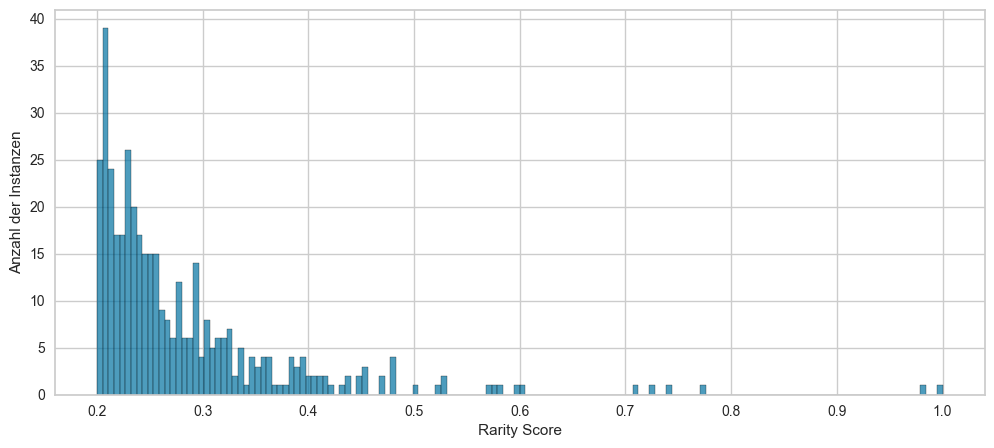

In [208]:
# Erstelle  Histogramm der Ähnlichkeitsverteilungen
plt.figure(figsize=(12, 5))
plt.hist(rarityScore, bins=150, edgecolor='black', alpha=0.7, range=[0.2,1])

plt.xlabel('Rarity Score')
plt.ylabel('Anzahl der Instanzen')
plt.show()

# Flow Methode

In [154]:
from tqdm import tqdm

In [155]:
def compute_flows(distances, decay=10):
    return np.exp(-decay * distances)

In [181]:
sorted_ids = np.argsort(scores)

In [185]:
n_next_hubs = 100

# Iterative Flusssuche
inward_flow_results = np.zeros(len(scores))
for id in tqdm(range(len(scores))):
    idx = sorted_ids[id][1:(n_next_hubs + 1)]
    inward_flow_results[id] += compute_flows(scores[id, idx]).sum()

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:00<00:00, 48800.82it/s]


<Axes: ylabel='Frequency'>

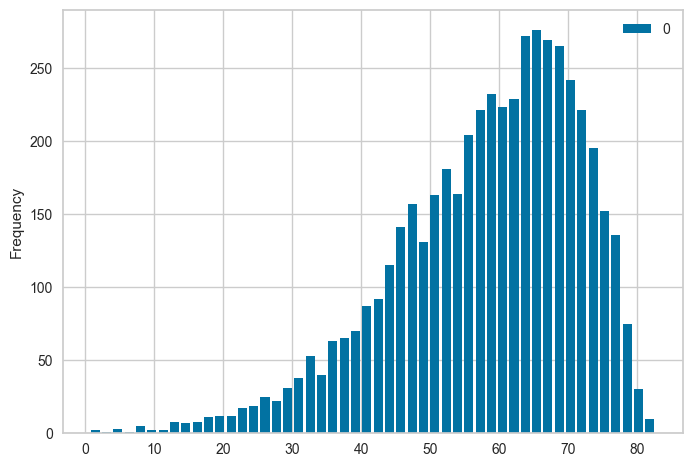

In [197]:
pd.DataFrame(inward_flow_results).plot(kind="hist", bins=50, rwidth=0.8)

In [205]:
# Indizes der Top-5-Werte
last_5_indices_flow = np.argpartition(inward_flow_results, -5)[-5:]

# Indizes der letzten-5-Werte
top_5_indices_flow = np.argpartition(inward_flow_results, 5)[:5]

# Zeige die Top 5
print("Top 5:")
for i in top_5_indices_flow:
    print('Mittelwert:', inward_flow_results[i], ' Index:', i)
    print('Headline: ' , reviews[i])

# Zeige die letzten 5 der bereinigten Liste
print("\nLast 5:")
for i in last_5_indices_flow:
    print('Mittelwert:', inward_flow_results[i], ' Index:', i)
    print('Headline: ' , reviews[i])

Top 5:
Mittelwert: 0.6036472921903683  Index: 3991
Headline:  Questo posto necessita innanzitutto di una raccomandazione: dimenticate le parole antipasto, primo e secondo e fidatevi del mio consiglio. Prendete due tre portate in quattro, non di più. Altrimenti rischiate di non finire il cibo.  In quattro abbiamo preso: un insalata con il baccalà e il pulpito gallego di antipasto. Il polpo era qualcosa di divino. Uno di noi ha preso un menu del dia, con trippa e pollo, mentre gli altri hanno preso una porzione di riso funghi e tartufo, buonissima, e soprattutto due porzioni di carne arrosto.  Questo merita una descrizione. La carne viene portata in quantità industriale cruda e ogni tavolo viene fornito di una sorta di fornellino. Una figata pazzesca. Poi abbiamo preso patate fritte, un vassoio, dolce, una bottiglia di vino, gassosa, birra e acqua. Un caffé. 138 euro in totale.  Se avessimo saputo quanto erano enormi le dosi, avremmo preso meno roba, comunque da provare.
Mittelwert: 2.10

In [203]:
# Normalisierung und Umkehrung
rarityScore_flow = 1-inward_flow_results
min_score = min(rarityScore_flow)
max_score = max(rarityScore_flow)
rarityScore_flow = (rarityScore_flow - min_score) / (max_score - min_score)

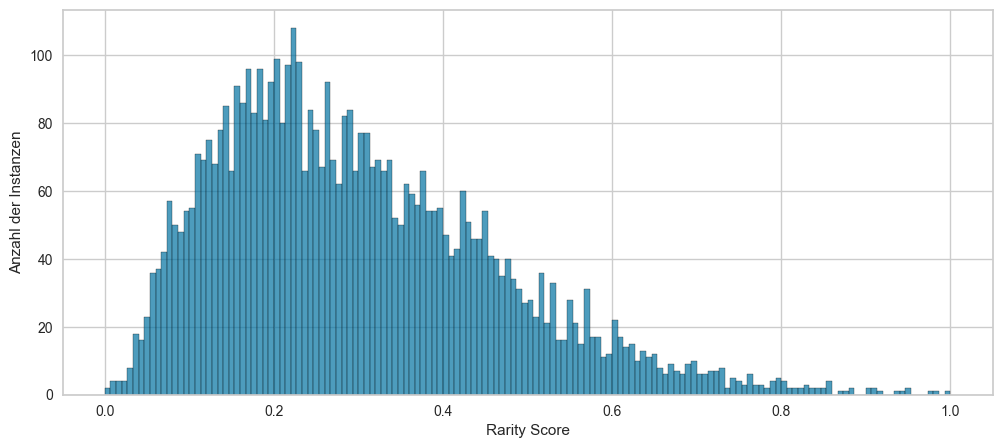

In [204]:
# Erstelle  Histogramm der Ähnlichkeitsverteilungen
plt.figure(figsize=(12, 5))
plt.hist(rarityScore_flow, bins=150, edgecolor='black', alpha=0.7, range=[0,1])

plt.xlabel('Rarity Score')
plt.ylabel('Anzahl der Instanzen')
plt.show()

# Ausreißer Methoden

## LOF

In [11]:
from pyod.models.lof import LOF

# LOF-Modell mit 200 Nachbarn instanziieren
lof = LOF(n_neighbors=200, novelty=True, metric='cosine')

# LOF an der Ähnlichkeitsmatrix anpassen
lof.fit(scores)

# Anomalie-Scores berechnen
rarity_score_lof = lof.decision_function(scores)

# Normalisierung der Scores
min_score = min(rarity_score_lof)
max_score = max(rarity_score_lof)
rarity_score_lof = (rarity_score_lof - min_score) / (max_score - min_score)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


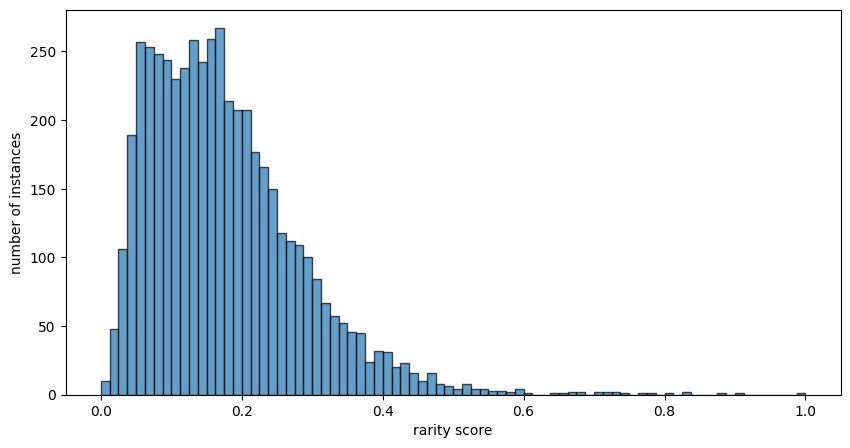

In [12]:
# Erstelle  Histogramm der Ähnlichkeitsverteilungen
plt.figure(figsize=(10, 5))
plt.hist(rarity_score_lof, bins=80, edgecolor='black', alpha=0.7, range=[0,1])

plt.xlabel('rarity score')
plt.ylabel('number of instances')
plt.show()

## SOS

In [13]:
from pyod.models.sos import SOS

# SOS-Modell mit Standardparametern instanziieren
sos = SOS(metric='euclidean', perplexity=200)

# SOS an der Ähnlichkeitsmatrix anpassen
sos.fit(scores)

# Anomalie-Scores berechnen
outlier_scores_sos = sos.decision_function(scores)

# Normalisierung der Scores
min_score = min(outlier_scores_sos)
max_score = max(outlier_scores_sos)
rarity_score_sos = (outlier_scores_sos - min_score) / (max_score - min_score)


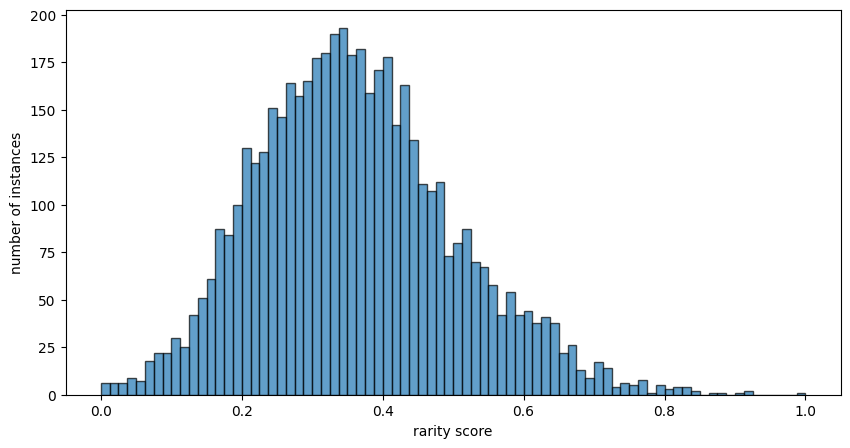

In [14]:
# Erstelle  Histogramm der Ähnlichkeitsverteilungen
plt.figure(figsize=(10, 5))
plt.hist(rarity_score_sos, bins=80, edgecolor='black', alpha=0.7, range=[0,1])

plt.xlabel('rarity score')
plt.ylabel('number of instances')
plt.show()